In [1]:
# Download Data
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
#Y data 는 이미 categorical data 이다
print(x_train.shape)

(50000, 32, 32, 3)


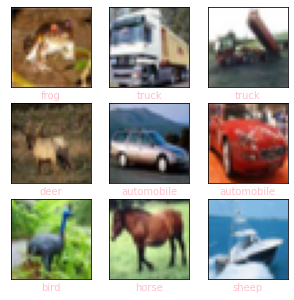

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

class_names = ['airplane','automobile','bird','cat',
              'deer','dog','frog','horse','sheep','truck']

sample_size = 9
random_idx = np.random.randint(60000,size=sample_size)

plt.figure(figsize = (5,5))
for i,idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(class_names[int(y_train[i])],color="pink")
plt.show()

In [3]:
#Data Preprocessing 
# 평균과 표준 편차는 채널별로 구성
x_mean = np.mean(x_train,axis=(0,1,2))
x_std = np.std(x_train,axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

#Create Validation Data
x_train,x_val ,y_train , y_val = train_test_split(x_train,y_train,
                                                 test_size=0.3)

In [5]:
#Create Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
model = Sequential()
# input Shape = (32,32,3)
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation="relu",input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="same"))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="same"))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="same"))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(optimizer = Adam(1e-4),
             loss = "sparse_categorical_crossentropy",
             metrics = ['acc'])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

In [7]:
history = model.fit(x_train,y_train,
                   epochs = 30,
                   batch_size=32,
                    validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 95s 87ms/step - loss: 1.6619 - acc: 0.4027 - val_loss: 1.4138 - val_acc: 0.4847
Epoch 2/30
1094/1094 [==============================] - 99s 91ms/step - loss: 1.2986 - acc: 0.5369 - val_loss: 1.2216 - val_acc: 0.5650
Epoch 3/30
1094/1094 [==============================] - 92s 84ms/step - loss: 1.1252 - acc: 0.5985 - val_loss: 1.1144 - val_acc: 0.6055
Epoch 4/30
1094/1094 [==============================] - 94s 86ms/step - loss: 0.9906 - acc: 0.6521 - val_loss: 0.9920 - val_acc: 0.6532
Epoch 5/30
1094/1094 [==============================] - 96s 88ms/step - loss: 0.8780 - acc: 0.6907 - val_loss: 0.9259 - val_acc: 0.6718
Epoch 6/30
1094/1094 [==============================] - 97s 88ms/step - loss: 0.7859 - acc: 0.7239 - val_loss: 0.8916 - val_acc: 0.6857
Epoch 7/30
1094/1094 [==============================] - 93s 85ms/step - loss: 0.6973 - acc: 0.7600 - val_loss: 0.8685 - val_acc: 0.6972
Epoch 8/30
1094/1094 [==========================

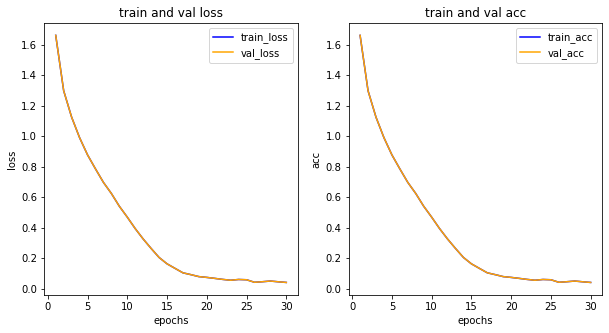

In [8]:
# result visualation
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize= (10,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color="blue",label="train_loss")
ax1.plot(epochs,loss,color="orange",label="val_loss")
ax1.set_title("train and val loss")
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']


ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color="blue",label="train_acc")
ax2.plot(epochs,loss,color="orange",label="val_acc")
ax2.set_title("train and val acc")
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()



In [10]:
import tensorflow as tf
# model 의 layer에 저장되어 있는 이름과 출력값을 받아온다
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

#모델 전체에서 output을 가져온다.
visual_model = tf.keras.models.Model(inputs = model.input ,outputs = get_output)

#테스트 셋의 두번째는 "Sheep"
test_img = np.expand_dim(x_test[1],axis=0)
feature_maps = visual_model.predict(test_img)

for layer_name,feature_map in zip(get_layer_name,feature_maps):
    #Dense층은 제외
    if(len(feature_map.shape)==4):
        img_size=feature_map.shape[1]
        features = feature_map.shape[-1]
        
        display_grid = np.zeros((img_size,img_size*features))
        #각 특징맵을 display_grid에 붙힌다
        for i in range(features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            display_grid[:,i*img_size : (i+1) * img_size] = x
        plt.figure(figsize = (features,2+1./features))
        plt.title(layer_name,fontsize=20)
        plt.grid(False)
        plt.imshow(display_grid,aspect='auto',cmap='virdis')

AttributeError: module 'numpy' has no attribute 'expand_dim'

In [ ]:
get_output